In [1]:
import pandas as pd

df = pd.read_csv('../../data/Apartments/listings_data_m2_medellin_2025-01-26.csv')

In [2]:
import ast

# # df['coordinates'].apply(lambda x: x.get('lon') if isinstance(x, dict) else None)


# df['coordinates'].iloc[0]

# # If the value is a string representation of a dict, evaluate it to a dict

# coord = df['coordinates'].iloc[0]
# if isinstance(coord, str):
#     coord = ast.literal_eval(coord)
# coord




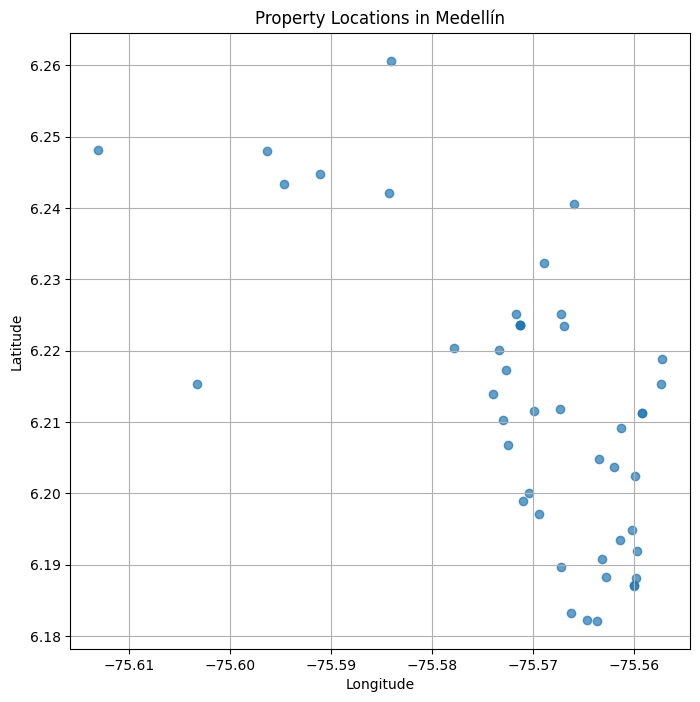

In [3]:
import matplotlib.pyplot as plt

# Extract longitude and latitude from the 'coordinates' column
df['coordinates'] = df['coordinates'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['lon'] = df['coordinates'].apply(lambda x: x.get('lon') if isinstance(x, dict) else None)
df['lat'] = df['coordinates'].apply(lambda x: x.get('lat') if isinstance(x, dict) else None)


# Drop rows with missing coordinates
df = df[(df['lon'] != 0.0) & (df['lat'] != 0.0)]

df_map = df.dropna(subset=['lon', 'lat'])

plt.figure(figsize=(8, 8))
plt.scatter(df_map['lon'], df_map['lat'], alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Locations in Medellín')
plt.grid(True)
plt.show()

In [4]:
import folium

# Center the map on the mean coordinates
center_lat = df_map['lat'].mean()
center_lon = df_map['lon'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

for _, row in df_map.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=row['neighborhood'],
        tooltip=row['propertyId']
    ).add_to(m)

m

SSLError: HTTPSConnectionPool(host='a.basemaps.cartocdn.com', port=443): Max retries exceeded with url: /light_all/14/4750/7906.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))

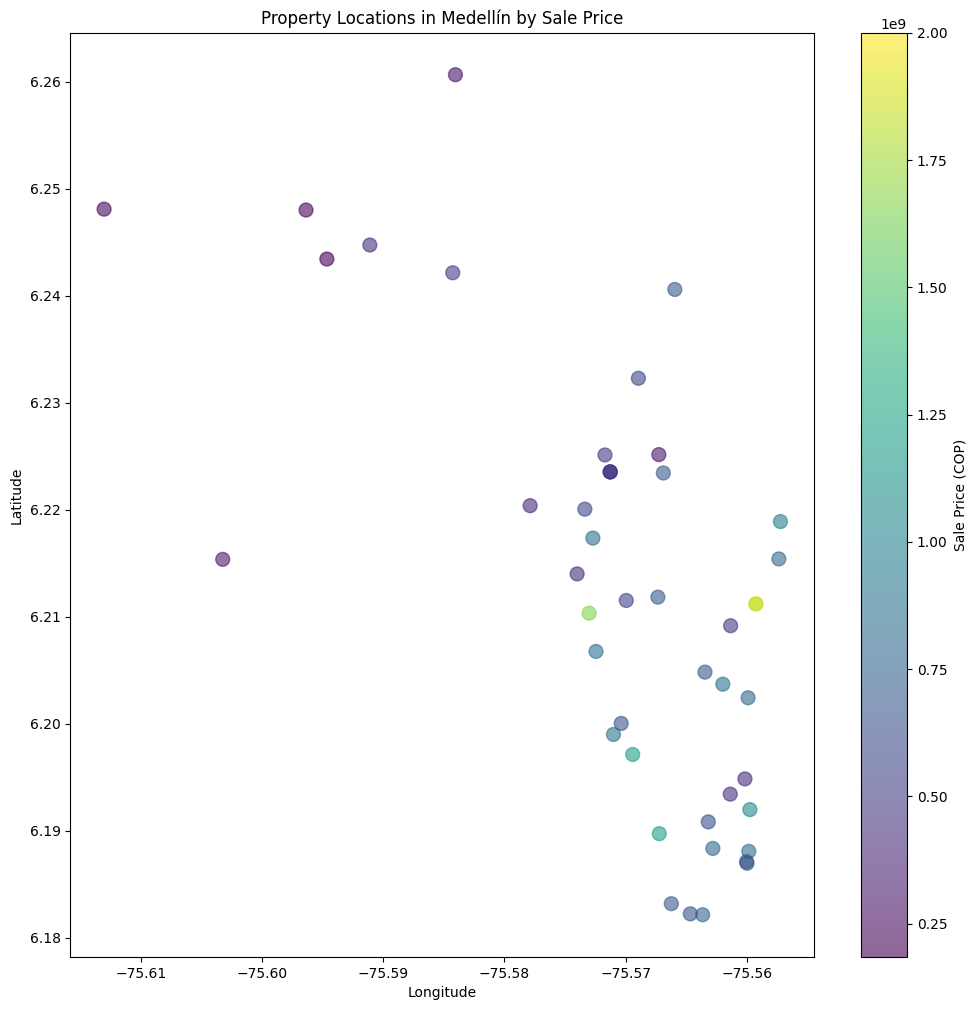

In [6]:
import contextily as ctx
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning) # To suppress the warning


# Create figure and axis with larger size
fig, ax = plt.subplots(figsize=(12, 12))

# Create scatter plot with price-based coloring
scatter = plt.scatter(df_map['lon'], df_map['lat'], 
                     c=df_map['salePrice'],
                     cmap='viridis',
                     alpha=0.6,
                     s=100)

# Add colorbar
plt.colorbar(scatter, label='Sale Price (COP)')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Locations in Medellín by Sale Price')

# Add background map
# try:
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron, verify=False)
# except:
#     plt.grid(True)  # Fallback to grid if basemap fails
#     plt.grid(True)  # Fallback to grid if basemap fails

# Adjust plot limits to focus on Medellín
plt.xlim(df_map['lon'].min() - 0.01, df_map['lon'].max() + 0.01)
plt.ylim(df_map['lat'].min() - 0.01, df_map['lat'].max() + 0.01)

plt.tight_layout()
plt.show()